In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
os.chdir('../../../')

In [3]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"
                                                ] + plt.rcParams["font.serif"]
plt.rcParams['font.size'] = 13
plt.rcParams['figure.dpi'] = 300

In [4]:
os.getcwd()

'/Users/gbemidebe/Documents/GitHub/monsur'

In [5]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"
                                                ] + plt.rcParams["font.serif"]
plt.rcParams['font.size'] = 13
plt.rcParams['figure.dpi'] = 300

# The Data

In [6]:
data = pd.read_csv('./data/cleaned_data.csv')
# data = data.drop(columns=['S/N'])
data

,S/N,cDen,Pot,Sn %,pH,weight,Cu %,C2H4,CO,H2,EtoH,FORM
0,1,150,3.5,1.00,14.05,118.71000,0.00,0.00,0.23,0.12,0.00,0.61
1,2,150,3.3,0.80,14.05,107.67720,0.20,0.00,0.23,0.07,0.00,0.66
2,3,150,3.2,0.50,14.05,91.12800,0.50,0.00,0.34,0.05,0.03,0.52
3,4,150,3.1,0.10,14.05,69.06240,0.90,0.01,0.42,0.05,0.02,0.42
4,5,150,3.0,0.05,14.05,66.30420,0.95,0.04,0.48,0.05,0.10,0.19
5,6,150,3.0,0.03,14.05,65.20092,0.97,0.07,0.50,0.05,0.11,0.14
6,7,150,2.8,0.00,14.05,63.54600,1.00,0.15,0.47,0.11,0.06,0.11
7,8,250,4.0,1.00,14.05,118.71000,0.00,0.00,0.22,0.12,0.00,0.63
8,9,250,3.8,0.80,14.05,107.67720,0.20,0.00,0.17,0.10,0.00,0.70
9,10,250,3.7,0.50,14.05,91.12800,0.50,0.02,0.36,0.08,0.02,0.48


In [7]:
features_col = ['S/N', 'cDen', 'Pot', 'Sn %', 'pH', 'weight', 'Cu %']
target_col = ['C2H4', 'CO', 'H2', 'EtoH', 'FORM']

In [8]:
data[features_col[1:]] = data[features_col[1:]] / data[features_col[1:]].max()

In [9]:
data.head()

,S/N,cDen,Pot,Sn %,pH,weight,Cu %,C2H4,CO,H2,EtoH,FORM
0,1,0.333333,0.744681,1.00,1.0,1.000000,0.00,0.00,0.23,0.12,0.00,0.61
1,2,0.333333,0.702128,0.80,1.0,0.907061,0.20,0.00,0.23,0.07,0.00,0.66
2,3,0.333333,0.680851,0.50,1.0,0.767652,0.50,0.00,0.34,0.05,0.03,0.52
3,4,0.333333,0.659574,0.10,1.0,0.581774,0.90,0.01,0.42,0.05,0.02,0.42
4,5,0.333333,0.638298,0.05,1.0,0.558539,0.95,0.04,0.48,0.05,0.10,0.19


In [10]:
len(features_col)

7

In [11]:
import numpy as np

def equation_1(weight, Sn_percent, Cu_percent):
    a0 = -1.146576672073183
    c0 = 0.6202633338240948
    return c0 + a0 * (np.abs((weight * Sn_percent) - np.abs(Cu_percent - weight)))

def equation_2(weight, Sn_percent, Cu_percent, Pot):
    a0 = -0.3157925646715826
    a1 = -1.248137749561206
    c0 = 0.6669209093969999
    return c0 + a0 * ((Pot**6)**6) + a1 * (np.abs((weight * Sn_percent) - np.abs(Cu_percent - weight)))

def equation_3(weight, Sn_percent, Cu_percent, Pot):
    a0 = -1.888797592776070
    a1 = -0.2912363886677266
    a2 = -1.738294306358969
    c0 = 0.8851948883060691
    return c0 + a0 * (np.abs(Cu_percent - Sn_percent) * (Cu_percent * Sn_percent)) + a1 * ((Pot**6)**6) + a2 * np.abs(np.sin(Sn_percent) - np.abs(Cu_percent - weight))

def equation_4(weight, Sn_percent, Cu_percent, Pot):
    a0 = -0.5364780469514464
    a1 = -0.2936337941936263
    a2 = -3.418184625384927
    a3 = 2.256351871067753
    c0 = 1.157211613724235
    return c0 + a0 * np.abs((Cu_percent**6) - Sn_percent) + a1 * ((Pot**6)**6) + a2 * np.abs((weight * Sn_percent) - np.abs(Cu_percent - weight)) + a3 * (np.abs(Cu_percent - weight) * (Cu_percent**6))

def equation_5(weight, Sn_percent, Cu_percent, Pot, cDen):
    a0 = -0.08355848731325252
    a1 = 0.2917536395954314
    a2 = -0.2191957658511366
    a3 = -0.3299786804168457
    a4 = -1.300602102341639
    c0 = 0.7594323033215936
    return c0 + a0 * np.abs(np.sin(cDen) - np.abs(Cu_percent - Sn_percent)) + a1 * np.abs(np.cbrt(Sn_percent) - (weight**2)) + a2 * np.abs(np.exp(-1.0 * Pot) - (Cu_percent**6)) + a3 * ((Pot**6)**6) + a4 * np.abs((weight * Sn_percent) - np.abs(Cu_percent - weight))

def equation_6(weight, Sn_percent, Cu_percent, Pot, cDen, pH):
    a0 = -0.1001127428547696
    a1 = -0.09893185561627102
    a2 = -0.2577044948418116
    a3 = 0.3546914036535919
    a4 = -0.2754312170894154
    a5 = -1.318852499278862
    c0 = 0.8093928041557034
    return c0 + a0 * np.abs(np.abs(Cu_percent - cDen) - np.sqrt(Cu_percent)) + a1 * np.abs((pH * cDen) - np.abs(Cu_percent - Sn_percent)) + a2 * np.abs((Cu_percent**6) - np.exp(-1.0 * weight)) + a3 * np.abs(np.cbrt(Sn_percent) - (weight**2)) + a4 * ((Pot**6)**6) + a5 * np.abs((weight * Sn_percent) - np.abs(Cu_percent - weight))


In [12]:
data['Formate_pred_1'] = equation_1(data['weight'], data['Sn %'], data['Cu %'])
data['Formate_pred_2'] = equation_2(data['weight'], data['Sn %'], data['Cu %'], data['Pot'])
data['Formate_pred_3'] = equation_3(data['weight'], data['Sn %'], data['Cu %'], data['Pot'])
data['Formate_pred_4'] = equation_4(data['weight'], data['Sn %'], data['Cu %'], data['Pot'])
data['Formate_pred_5'] = equation_5(data['weight'], data['Sn %'], data['Cu %'], data['Pot'], data['cDen'])
data['Formate_pred_6'] = equation_6(data['weight'], data['Sn %'], data['Cu %'], data['Pot'], data['cDen'], data['pH'])


In [13]:
data.head()

,S/N,cDen,Pot,Sn %,pH,weight,Cu %,C2H4,CO,H2,EtoH,FORM,Formate_pred_1,Formate_pred_2,Formate_pred_3,Formate_pred_4,Formate_pred_5,Formate_pred_6
0,1,0.333333,0.744681,1.00,1.0,1.000000,0.00,0.00,0.23,0.12,0.00,0.61,0.620263,0.666913,0.609618,0.620726,0.599113,0.615256
1,2,0.333333,0.702128,0.80,1.0,0.907061,0.20,0.00,0.23,0.07,0.00,0.66,0.598951,0.643720,0.685973,0.664628,0.634654,0.660492
2,3,0.333333,0.680851,0.50,1.0,0.767652,0.50,0.00,0.34,0.05,0.03,0.52,0.487061,0.521920,0.517070,0.509687,0.533105,0.526022
3,4,0.333333,0.659574,0.10,1.0,0.581774,0.90,0.01,0.42,0.05,0.02,0.42,0.322098,0.342344,0.369571,0.418449,0.415229,0.419520
4,5,0.333333,0.638298,0.05,1.0,0.558539,0.95,0.04,0.48,0.05,0.10,0.19,0.203444,0.213181,0.210853,0.196336,0.209871,0.216042


In [14]:
def percentage_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred)) * 100

In [15]:
from src.plotter import plot_data

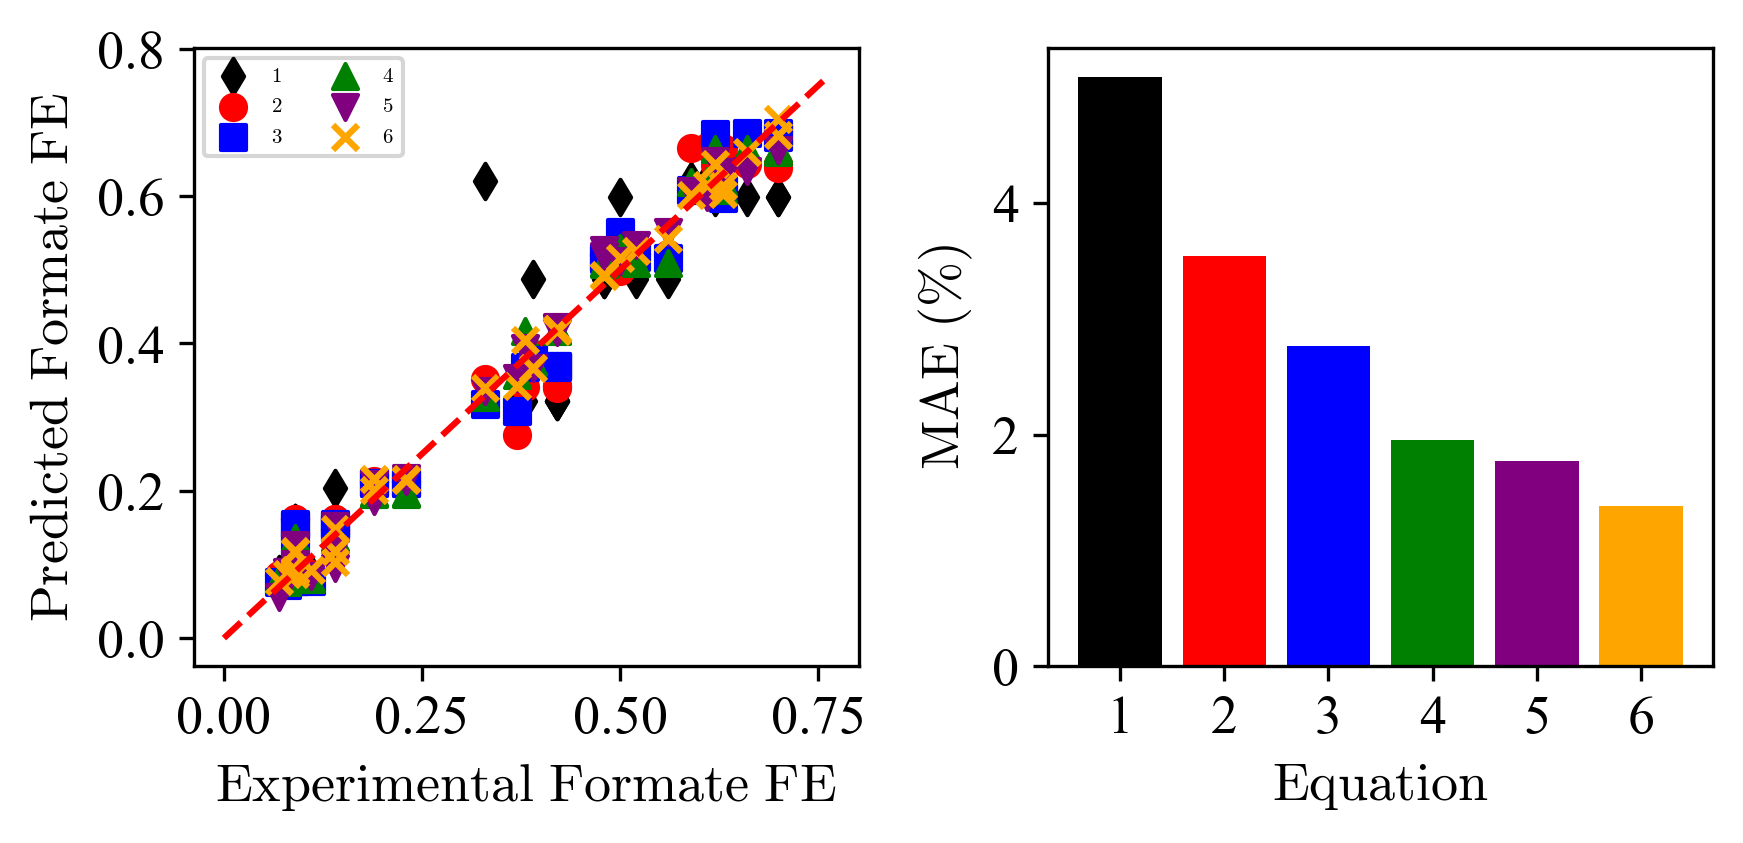

In [16]:
plot_data(data, metric=percentage_mae, metric_name='MAE', name='FORM', pred_name='Formate_pred', title='Formate', figsize=(6, 4))

Text(0, 0.5, '$\\rm Predicted \\ Formate \\ FE$')

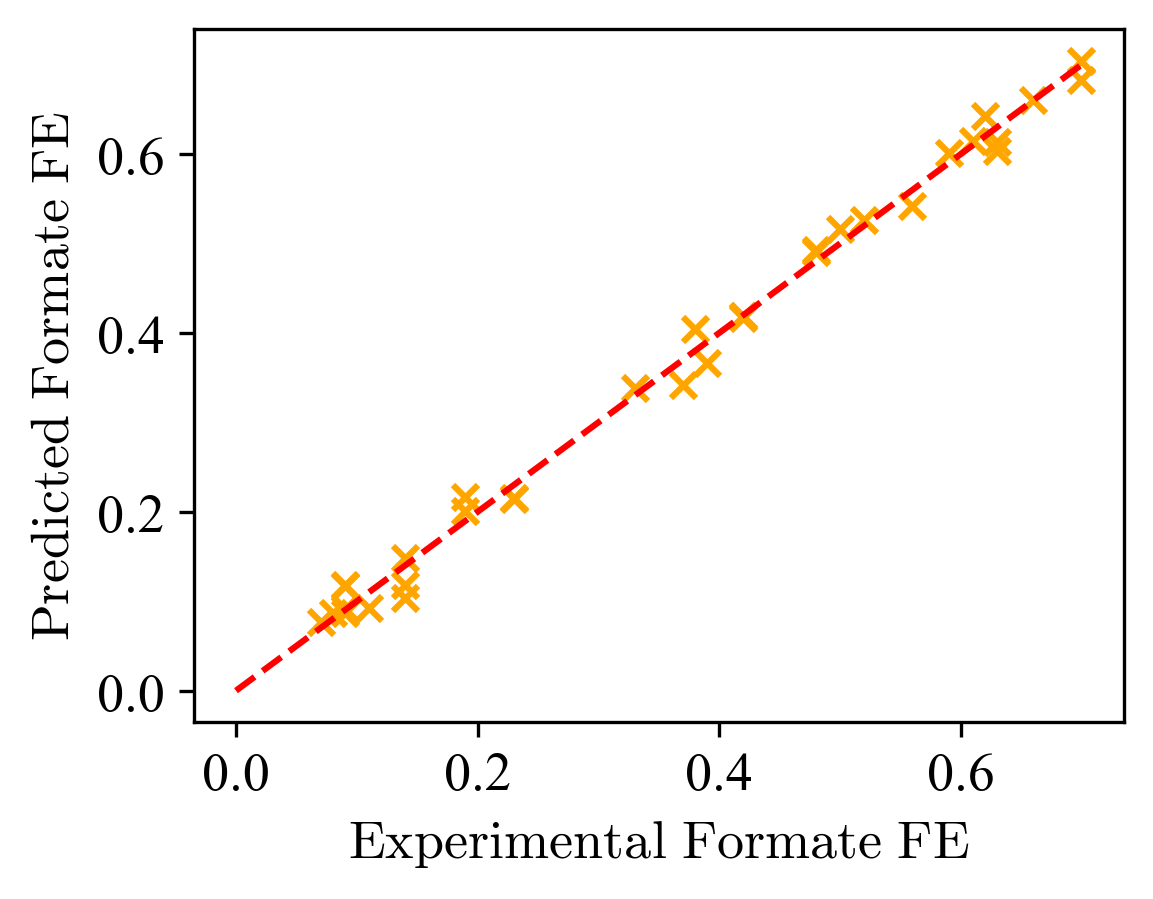

In [17]:
plt.figure(figsize=(4, 3))
plt.scatter(data['FORM'], data['Formate_pred_6'], label=r'$\rm Eqn 6$', marker='x', color='orange')
plt.plot([0, 0.7], [0, 0.7], color='red', linestyle='--')

plt.xlabel(r'$\rm Experimental \ Formate \ FE$')
plt.ylabel(r'$\rm Predicted \ Formate \ FE$')

